<a href="https://colab.research.google.com/github/rodrigodemend/Analise_Sazonalidade_de_Internacoes/blob/main/Notebooks/Analise_da_Sazonalidade_das_Internacoes_no_SUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise da Sazonalidade das Internações por Estado no SUS**

Neste Notebook, faremos uma análise com intuito de compreender se existe algum efeito da época do ano em relação ao número de internações nos estados do Brasil. Possibilitando assim uma melhor alocação de recursos escassos dependendo da época do ano.

Os dados utilizados foram retirados do DataSUS, no TabNet.

# Importação dos Dados

Importando as bibliotecas utilizadas nessa análise:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Importação dos dados de internação do SUS no período de Janeiro de 2008 até Dezembro de 2019.

Fonte: http://tabnet.datasus.gov.br/

Não foram utilizados dados de 2020 e 2021 pois o objetivo da analise é identificar se existe uma sazonalidade na quantidade de internações no SUS dependendo da época do ano, portanto a crise sanitátia do coronavirus poderia distorcer o resultado da analise. 

In [ ]:
# Criando dataframe com os dados
dados_internacoes_jan2008_dez2019 = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Analise_Sazonalidade_de_Internacoes/main/Dados/Internacoes_de_Janeiro_de_2008_ate_Dezembro_de_2019.csv',
                    encoding = 'ISO-8859-1', #encoding padrão usado pelo governo brasileiro
                    sep = ';', #separador com ponto e virgula
                    skiprows = 3, #pulando as 3 primeiras linhas
                    skipfooter = 12, #pulando as últimas 12 linhas
                    thousands = '.', #difinindo separador de milhar com ponto
                    decimal = ',', #definindo separador de decimal com virgula
                    engine='python'
                    )

In [ ]:
# Visualizando as primeiras 5 linhas
dados_internacoes_jan2008_dez2019.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Total
0,11 Rondônia,4142,7301,4318,4285,4511,3871,7560,7615,7507,7098,7004,6609,6441,7501,7835,7882,8462,8033,7950,7986,7842,8293,8497,8486,8561,8375,8198,8530,8769,8005,8440,8322,8776,8461,8056,7772,8014,7912,8362,...,8558,8661,8615,9061,8523,9484,10086,9317,9505,9569,9388,9106,9936,9674,9783,9446,9930,10315,10290,10537,10158,9965,10379,9494,10422,9498,9444,9708,9623,9899,10939,11252,10380,10646,10202,10244,10013,10283,9711,1263074
1,12 Acre,2087,3071,3783,3737,3609,4026,4880,4250,4552,4128,3836,4128,4430,4240,4162,4894,4647,4291,4582,4379,-,4689,3959,4327,4412,3665,4203,4735,4505,4143,3891,3906,4051,3778,4343,4055,4712,4235,4364,...,4173,3658,3713,3506,3776,3567,3418,3564,2980,2949,3848,3918,4617,4396,3463,4600,3225,3339,4237,3309,3961,3941,3982,3698,3973,3766,2580,3284,2899,3797,3037,3658,4213,4402,4033,3889,4255,3632,3464,582631
2,13 Amazonas,9325,12754,14780,14556,12833,14073,15430,15660,15061,14610,12389,12320,11034,10186,14478,12991,12876,12803,13929,13341,13917,13160,12689,12389,13510,12787,13160,14166,13970,14139,14064,12192,11684,14032,13542,13634,14083,12878,13807,...,12756,12605,12290,13701,12802,15101,14598,15400,14825,15405,14984,14965,15102,13849,14337,15074,14365,15120,15446,15705,15410,15802,15657,15803,16095,15196,15117,17444,15345,16796,16052,17051,15779,17043,16103,16964,16725,16206,15284,2021593
3,14 Roraima,1475,1812,1813,1964,2037,2030,2307,2153,1913,2550,2416,2233,2190,1971,2277,2340,2974,2570,2828,3024,3049,2108,2592,2122,2280,2027,2787,2898,2940,2912,2905,2701,2762,2580,2510,1897,1905,1912,2341,...,3732,3802,3193,3173,2989,3510,3829,3878,3915,4189,3969,3549,3655,3489,3513,3717,3776,3567,3461,3504,3661,3661,3739,3471,3901,3696,3591,3274,3086,2871,3172,3033,3591,4324,4881,4366,4288,4019,3767,416689
4,15 Pará,38628,41530,42790,41112,44643,43506,45110,43661,44256,43789,40719,39594,40817,40830,44278,43555,43281,42611,47090,46189,46025,45873,42567,43629,43572,43935,45532,43479,46248,44347,43483,43274,44740,43924,43262,42724,44832,43480,44181,...,39568,36353,35945,37874,38784,38240,39490,39638,40400,39264,39984,42506,42518,40717,40967,39487,39306,40553,41899,41519,41406,40710,41713,42521,44184,41147,39475,38268,39379,40493,41863,42449,41512,37799,38526,41093,41973,41094,40501,5947683


In [ ]:
# Visualizando as últimas 5 linhas
dados_internacoes_jan2008_dez2019.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Total
22,43 Rio Grande do Sul,41729,64477,61229,64063,56673,58261,64280,63316,61107,61707,57058,58889,54306,55841,62681,62314,61609,61481,63836,64022,62577,62529,60772,59768,58617,56728,59983,60903,63330,59602,62898,62619,60015,60108,60172,60515,55178,52884,59029,...,65122,61982,62084,59465,54957,61218,60358,65904,64774,67203,65685,64721,63043,62900,60383,60163,56474,61995,62533,62498,62037,64053,64525,63580,62715,61241,59573,59533,59283,60253,62291,65673,65334,68165,68263,65798,68534,62678,61288,8871387
23,50 Mato Grosso do Sul,9636,11206,12012,12609,13120,14507,13668,13334,14023,13170,12013,11623,12406,12076,13079,13510,13623,13430,13898,13435,13642,13490,12874,12574,13509,13847,13980,13845,14182,13982,13387,13469,13962,13512,13299,13076,12774,12251,13386,...,13127,13323,13119,12981,12566,13235,13226,14140,14051,14272,14385,13750,13934,13665,13411,13480,14282,13502,13927,14360,14969,14634,13642,14179,13788,13695,13117,14192,14263,13738,15213,15039,15049,15751,15505,15057,15188,14073,14234,1945467
24,51 Mato Grosso,9975,14329,14124,14822,14620,16373,15433,15374,14070,16011,13772,14256,13973,13427,16026,15127,15967,16037,15171,14993,14259,15312,14639,14179,14692,14565,15505,15382,15690,14797,15572,15192,15347,15186,15126,13955,14669,14179,14492,...,16145,15300,14436,15089,14786,15840,16378,16659,15595,16201,16501,15913,15962,15548,14931,16002,14645,16674,16113,16591,16184,16499,15367,16147,15868,15175,14846,14849,14785,16476,16261,17262,16278,16422,17444,16358,17215,16051,15752,2214373
25,52 Goiás,26465,34641,32161,32994,32742,27990,30697,30863,32003,30002,24986,27104,26411,28824,30928,31076,32108,30969,30315,30457,30352,31111,30799,30463,30912,31637,32747,31502,31871,30591,29894,31291,31608,30466,30335,28762,29911,30014,32014,...,25905,25323,25530,25952,25391,28116,27658,29698,28400,27397,27269,27875,28079,27302,26601,27422,25698,27890,27058,28492,27290,27002,27281,27826,27313,26394,26844,27096,26207,27783,28604,29738,28923,29715,29813,29175,29984,28449,27449,4160147
26,53 Distrito Federal,7754,12057,14746,14754,16759,17907,17778,18935,16208,19644,15021,16454,14697,12286,15658,15366,17818,18101,15968,16164,15826,16366,14682,13317,16298,13506,16704,16422,17032,15195,15558,15850,15067,14737,14643,13775,14453,14410,16339,...,15288,15847,15207,16631,16430,18563,16146,16295,15365,14742,16273,17050,17180,16468,15334,15604,16420,17820,18192,18943,19990,20646,20828,18002,16142,15461,13892,18401,18473,21607,19459,20326,18765,19976,21838,17908,18218,16924,17719,2289388


# Limpeza dos Dados

Nesta etapa nós transpomos o dataframe para ficar na correta visualização dos dados, assim como tratamos valores faltantes e ajustamos os datatypes das colunas.  

In [ ]:
# Definindo o indice como unidade da federação
dados_internacoes_jan2008_dez2019 = dados_internacoes_jan2008_dez2019.set_index('Unidade da Federação')
dados_internacoes_jan2008_dez2019.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4142,7301,4318,4285,4511,3871,7560,7615,7507,7098,7004,6609,6441,7501,7835,7882,8462,8033,7950,7986,7842,8293,8497,8486,8561,8375,8198,8530,8769,8005,8440,8322,8776,8461,8056,7772,8014,7912,8362,8711,...,8558,8661,8615,9061,8523,9484,10086,9317,9505,9569,9388,9106,9936,9674,9783,9446,9930,10315,10290,10537,10158,9965,10379,9494,10422,9498,9444,9708,9623,9899,10939,11252,10380,10646,10202,10244,10013,10283,9711,1263074
12 Acre,2087,3071,3783,3737,3609,4026,4880,4250,4552,4128,3836,4128,4430,4240,4162,4894,4647,4291,4582,4379,-,4689,3959,4327,4412,3665,4203,4735,4505,4143,3891,3906,4051,3778,4343,4055,4712,4235,4364,4412,...,4173,3658,3713,3506,3776,3567,3418,3564,2980,2949,3848,3918,4617,4396,3463,4600,3225,3339,4237,3309,3961,3941,3982,3698,3973,3766,2580,3284,2899,3797,3037,3658,4213,4402,4033,3889,4255,3632,3464,582631
13 Amazonas,9325,12754,14780,14556,12833,14073,15430,15660,15061,14610,12389,12320,11034,10186,14478,12991,12876,12803,13929,13341,13917,13160,12689,12389,13510,12787,13160,14166,13970,14139,14064,12192,11684,14032,13542,13634,14083,12878,13807,14003,...,12756,12605,12290,13701,12802,15101,14598,15400,14825,15405,14984,14965,15102,13849,14337,15074,14365,15120,15446,15705,15410,15802,15657,15803,16095,15196,15117,17444,15345,16796,16052,17051,15779,17043,16103,16964,16725,16206,15284,2021593
14 Roraima,1475,1812,1813,1964,2037,2030,2307,2153,1913,2550,2416,2233,2190,1971,2277,2340,2974,2570,2828,3024,3049,2108,2592,2122,2280,2027,2787,2898,2940,2912,2905,2701,2762,2580,2510,1897,1905,1912,2341,2262,...,3732,3802,3193,3173,2989,3510,3829,3878,3915,4189,3969,3549,3655,3489,3513,3717,3776,3567,3461,3504,3661,3661,3739,3471,3901,3696,3591,3274,3086,2871,3172,3033,3591,4324,4881,4366,4288,4019,3767,416689
15 Pará,38628,41530,42790,41112,44643,43506,45110,43661,44256,43789,40719,39594,40817,40830,44278,43555,43281,42611,47090,46189,46025,45873,42567,43629,43572,43935,45532,43479,46248,44347,43483,43274,44740,43924,43262,42724,44832,43480,44181,43663,...,39568,36353,35945,37874,38784,38240,39490,39638,40400,39264,39984,42506,42518,40717,40967,39487,39306,40553,41899,41519,41406,40710,41713,42521,44184,41147,39475,38268,39379,40493,41863,42449,41512,37799,38526,41093,41973,41094,40501,5947683


In [ ]:
# Transpondo os dados
dados_internacoes_jan2008_dez2019 = dados_internacoes_jan2008_dez2019.T
dados_internacoes_jan2008_dez2019.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2008/Jan,4142,2087,9325,1475,38628,2386,6665,21417,15878,29823,9916,17126,25390,12168,5832,41659,67509,9502,34859,125361,51180,23728,41729,9636,9975,26465,7754
2008/Fev,7301,3071,12754,1812,41530,2650,7638,25681,18994,39604,12779,17409,35496,14315,7015,51637,89738,12962,37109,155799,61926,30418,64477,11206,14329,34641,12057
2008/Mar,4318,3783,14780,1813,42790,2262,9491,26368,18383,42328,14022,19013,40756,13861,8804,59728,96161,15098,57367,169738,63178,30982,61229,12012,14124,32161,14746
2008/Abr,4285,3737,14556,1964,41112,2259,8330,28277,18909,44200,14067,19821,45354,15975,9035,74525,93949,15108,51389,178746,60734,30729,64063,12609,14822,32994,14754
2008/Mai,4511,3609,12833,2037,44643,1555,8627,27902,19418,43822,15292,19289,44463,15549,8635,79931,96064,13899,56472,200439,60660,31003,56673,13120,14620,32742,16759


In [ ]:
# Apagando valores Totais
dados_internacoes_jan2008_dez2019.drop("Total", axis = 0, inplace=True)

In [ ]:
# Verificando se existe valores NaN
dados_internacoes_jan2008_dez2019.isnull().sum()

Unidade da Federação
11 Rondônia               0
12 Acre                   0
13 Amazonas               0
14 Roraima                0
15 Pará                   0
16 Amapá                  0
17 Tocantins              0
21 Maranhão               0
22 Piauí                  0
23 Ceará                  0
24 Rio Grande do Norte    0
25 Paraíba                0
26 Pernambuco             0
27 Alagoas                0
28 Sergipe                0
29 Bahia                  0
31 Minas Gerais           0
32 Espírito Santo         0
33 Rio de Janeiro         0
35 São Paulo              0
41 Paraná                 0
42 Santa Catarina         0
43 Rio Grande do Sul      0
50 Mato Grosso do Sul     0
51 Mato Grosso            0
52 Goiás                  0
53 Distrito Federal       0
dtype: int64

In [ ]:
# Verificando o datatype das colunas
dados_internacoes_jan2008_dez2019.dtypes

Unidade da Federação
11 Rondônia               object
12 Acre                   object
13 Amazonas               object
14 Roraima                object
15 Pará                   object
16 Amapá                  object
17 Tocantins              object
21 Maranhão               object
22 Piauí                  object
23 Ceará                  object
24 Rio Grande do Norte    object
25 Paraíba                object
26 Pernambuco             object
27 Alagoas                object
28 Sergipe                object
29 Bahia                  object
31 Minas Gerais           object
32 Espírito Santo         object
33 Rio de Janeiro         object
35 São Paulo              object
41 Paraná                 object
42 Santa Catarina         object
43 Rio Grande do Sul      object
50 Mato Grosso do Sul     object
51 Mato Grosso            object
52 Goiás                  object
53 Distrito Federal       object
dtype: object

In [ ]:
# Verificando se existe '-' nas colunas e substituindo por valor NaN
valores_indesejaveis = ['-']
for coluna in dados_internacoes_jan2008_dez2019.columns: 
  if dados_internacoes_jan2008_dez2019[coluna].isin(valores_indesejaveis).sum() > 0:
    dados_internacoes_jan2008_dez2019[coluna].replace('-', np.nan, inplace=True)

In [ ]:
# Substituindo os valores NaN pela média da coluna
for coluna in dados_internacoes_jan2008_dez2019.columns:
  if dados_internacoes_jan2008_dez2019[coluna].isnull().sum() > 0:
    dados_internacoes_jan2008_dez2019[coluna].fillna(int(dados_internacoes_jan2008_dez2019[coluna].mean()), inplace=True)

In [ ]:
# Passando todas as colunas para int
dados_internacoes_jan2008_dez2019 = dados_internacoes_jan2008_dez2019.astype('int')
# Verificando o datatype das colunas
dados_internacoes_jan2008_dez2019.dtypes

Unidade da Federação
11 Rondônia               int64
12 Acre                   int64
13 Amazonas               int64
14 Roraima                int64
15 Pará                   int64
16 Amapá                  int64
17 Tocantins              int64
21 Maranhão               int64
22 Piauí                  int64
23 Ceará                  int64
24 Rio Grande do Norte    int64
25 Paraíba                int64
26 Pernambuco             int64
27 Alagoas                int64
28 Sergipe                int64
29 Bahia                  int64
31 Minas Gerais           int64
32 Espírito Santo         int64
33 Rio de Janeiro         int64
35 São Paulo              int64
41 Paraná                 int64
42 Santa Catarina         int64
43 Rio Grande do Sul      int64
50 Mato Grosso do Sul     int64
51 Mato Grosso            int64
52 Goiás                  int64
53 Distrito Federal       int64
dtype: object

# Manipulação dos dados

Nesta etapa nós agrupamos os dados pelos meses do ano e ajustamos os nomes das linhas e colunas. Também transformamos os dados em relação a média de cada estado para que pudessemos ver os dados de uma forma percentual em relação a média, sendo assim possível analisar todos os dados na mesma escala buscando entender o comportamento sazonal dos dados, deixando de lado a ordem de grandeza do volume de internações em cada estado. 


In [ ]:
# Criando uma nova coluna com o mês
mes = []
for index in dados_internacoes_jan2008_dez2019.index:
  mes.append(index[-3:])
dados_internacoes_jan2008_dez2019.insert(0, 'Mês', mes)
dados_internacoes_jan2008_dez2019.head()

Unidade da Federação,Mês,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2008/Jan,Jan,4142,2087,9325,1475,38628,2386,6665,21417,15878,29823,9916,17126,25390,12168,5832,41659,67509,9502,34859,125361,51180,23728,41729,9636,9975,26465,7754
2008/Fev,Fev,7301,3071,12754,1812,41530,2650,7638,25681,18994,39604,12779,17409,35496,14315,7015,51637,89738,12962,37109,155799,61926,30418,64477,11206,14329,34641,12057
2008/Mar,Mar,4318,3783,14780,1813,42790,2262,9491,26368,18383,42328,14022,19013,40756,13861,8804,59728,96161,15098,57367,169738,63178,30982,61229,12012,14124,32161,14746
2008/Abr,Abr,4285,3737,14556,1964,41112,2259,8330,28277,18909,44200,14067,19821,45354,15975,9035,74525,93949,15108,51389,178746,60734,30729,64063,12609,14822,32994,14754
2008/Mai,Mai,4511,3609,12833,2037,44643,1555,8627,27902,19418,43822,15292,19289,44463,15549,8635,79931,96064,13899,56472,200439,60660,31003,56673,13120,14620,32742,16759


In [ ]:
# Agrupando os meses pela média e ordenando
ordem_mes = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'] #oderm dos meses
dados_internacoes_agrupados_por_mes = round(dados_internacoes_jan2008_dez2019.groupby('Mês').mean(),2)
dados_internacoes_agrupados_por_mes = dados_internacoes_agrupados_por_mes.T
dados_internacoes_agrupados_por_mes = dados_internacoes_agrupados_por_mes[ordem_mes]
dados_internacoes_agrupados_por_mes = dados_internacoes_agrupados_por_mes.T
dados_internacoes_agrupados_por_mes

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
Mês,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan,8219.50,4006.67,13507.00,2572.50,40128.92,2951.42,7354.75,32343.67,18052.33,37822.00,12742.92,15761.50,40663.67,13488.50,7145.50,64065.00,93709.75,17138.58,50856.17,183302.17,62531.08,33553.42,56958.00,12816.75,14350.50,27806.58,14574.92
Fev,8547.08,3787.50,13063.67,2568.08,40817.50,2883.58,7546.25,32429.08,17542.08,38106.08,12691.92,15556.00,40693.67,13288.75,6864.17,63431.00,92462.00,16790.83,49598.00,182719.83,62423.33,33521.00,57505.25,12927.58,14469.67,28377.58,14698.33
Mar,8643.92,4091.83,14253.83,2777.67,41806.42,2868.83,8165.33,34192.58,18564.75,40803.17,14289.50,17127.75,43774.17,13879.17,7713.50,69745.67,99765.92,17905.83,55583.33,199711.83,65418.08,35768.83,61446.75,13287.33,15632.58,29871.83,16585.33
Abr,8948.08,4147.67,14075.92,2885.42,41807.75,2987.08,7898.33,34623.00,18592.17,41404.83,13849.83,17097.25,45359.75,14385.25,8077.67,71291.17,98665.00,18018.67,54780.08,199420.83,65698.33,35601.33,61491.08,13599.83,15825.25,29945.67,16300.17
Mai,9098.33,4073.42,14527.67,2959.08,42122.25,2969.83,8041.75,35117.33,19251.17,41960.75,14806.42,17597.08,46469.00,14951.75,8414.50,71730.00,102352.75,18582.00,57473.25,206752.50,66980.17,37249.42,62846.42,13800.33,15874.08,30226.92,17287.33
Jun,8777.08,4141.33,14365.42,2938.58,41872.42,3011.50,7907.58,34541.92,18739.25,41009.83,14154.75,16959.67,45734.17,14608.42,7909.25,70997.25,100767.67,18498.25,56241.75,199703.58,66221.17,36874.67,62855.00,13986.75,15888.58,28993.67,16540.42
Jul,9066.92,4168.50,14793.83,3200.83,41267.83,3120.08,7723.58,34926.83,18665.67,41198.92,14576.25,17233.00,45780.00,15182.33,8199.50,72655.00,101756.08,18827.67,58169.67,204162.75,67326.67,37629.92,65404.08,14077.25,15710.00,28745.00,16721.92
Ago,9004.92,4154.92,14232.75,3220.58,40820.42,3114.08,7895.25,34744.08,18638.17,41106.42,14182.33,17318.75,46550.58,14695.92,8415.83,73359.75,101003.33,18907.58,57923.58,205352.58,66982.50,37958.08,64641.25,14073.42,15598.08,29171.00,17307.75
Set,8919.42,4092.08,14298.33,3008.17,42330.25,3221.75,7770.42,34538.75,18481.92,40649.75,13960.83,16842.83,45246.50,14650.67,7957.67,72313.00,99552.67,18328.58,55979.08,200547.75,66599.83,37131.67,62191.92,13877.42,15541.67,29405.75,15887.00


In [ ]:
# Criando os labels dos estados por região
Norte = [estado[3:] for estado in dados_internacoes_agrupados_por_mes.columns if estado[0] == '1']
Nordeste = [estado[3:] for estado in dados_internacoes_agrupados_por_mes.columns if estado[0] == '2']
Sudeste = [estado[3:] for estado in dados_internacoes_agrupados_por_mes.columns if estado[0] == '3']
Sul = [estado[3:] for estado in dados_internacoes_agrupados_por_mes.columns if estado[0] == '4']
Centro_Oeste = [estado[3:] for estado in dados_internacoes_agrupados_por_mes.columns if estado[0] == '5']

# Exemplo
Norte

['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins']

In [ ]:
# Removendo os números dos nomes das colunas dos estados
nomes_colunas = list(dados_internacoes_agrupados_por_mes.columns)
nomes_colunas = [coluna[3:] for coluna in nomes_colunas]
dados_internacoes_agrupados_por_mes.columns = nomes_colunas
dados_internacoes_agrupados_por_mes.head()

,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Mês,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan,8219.50,4006.67,13507.00,2572.50,40128.92,2951.42,7354.75,32343.67,18052.33,37822.00,12742.92,15761.50,40663.67,13488.50,7145.50,64065.00,93709.75,17138.58,50856.17,183302.17,62531.08,33553.42,56958.00,12816.75,14350.50,27806.58,14574.92
Fev,8547.08,3787.50,13063.67,2568.08,40817.50,2883.58,7546.25,32429.08,17542.08,38106.08,12691.92,15556.00,40693.67,13288.75,6864.17,63431.00,92462.00,16790.83,49598.00,182719.83,62423.33,33521.00,57505.25,12927.58,14469.67,28377.58,14698.33
Mar,8643.92,4091.83,14253.83,2777.67,41806.42,2868.83,8165.33,34192.58,18564.75,40803.17,14289.50,17127.75,43774.17,13879.17,7713.50,69745.67,99765.92,17905.83,55583.33,199711.83,65418.08,35768.83,61446.75,13287.33,15632.58,29871.83,16585.33
Abr,8948.08,4147.67,14075.92,2885.42,41807.75,2987.08,7898.33,34623.00,18592.17,41404.83,13849.83,17097.25,45359.75,14385.25,8077.67,71291.17,98665.00,18018.67,54780.08,199420.83,65698.33,35601.33,61491.08,13599.83,15825.25,29945.67,16300.17
Mai,9098.33,4073.42,14527.67,2959.08,42122.25,2969.83,8041.75,35117.33,19251.17,41960.75,14806.42,17597.08,46469.00,14951.75,8414.50,71730.00,102352.75,18582.00,57473.25,206752.50,66980.17,37249.42,62846.42,13800.33,15874.08,30226.92,17287.33


In [ ]:
# Transformando os dados em relação a média
for estado in dados_internacoes_agrupados_por_mes.columns:
   dados_internacoes_agrupados_por_mes[estado] = dados_internacoes_agrupados_por_mes[estado] / dados_internacoes_agrupados_por_mes[estado].mean()
dados_internacoes_agrupados_por_mes

,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
Mês,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan,0.937085,0.983391,0.962116,0.889008,0.971566,0.972217,0.954513,0.950983,0.982899,0.942060,0.922005,0.944874,0.914878,0.945215,0.922783,0.920282,0.951596,0.944558,0.929076,0.929804,0.954534,0.929582,0.924540,0.948673,0.933209,0.962501,0.916747
Fev,0.974432,0.929598,0.930538,0.887481,0.988237,0.949870,0.979367,0.953494,0.955117,0.949136,0.918315,0.932555,0.915553,0.931217,0.886451,0.911174,0.938926,0.925393,0.906091,0.926850,0.952890,0.928684,0.933423,0.956876,0.940958,0.982266,0.924509
Mar,0.985472,1.004293,1.015314,0.959911,1.012180,0.945011,1.059712,1.005345,1.010799,1.016314,1.033907,1.026779,0.984860,0.972591,0.996135,1.001883,1.013095,0.986844,1.015435,1.013043,0.998604,0.990959,0.997401,0.983504,1.016582,1.033988,1.043199
Abr,1.020149,1.017998,1.002641,0.997148,1.012212,0.983964,1.025060,1.018001,1.012292,1.031300,1.002095,1.024950,1.020533,1.008055,1.043165,1.024084,1.001916,0.993062,1.000761,1.011566,1.002882,0.986318,0.998121,1.006635,1.029111,1.036544,1.025263
Mai,1.037278,0.999774,1.034820,1.022603,1.019826,0.978281,1.043674,1.032535,1.048172,1.045147,1.071308,1.054914,1.045490,1.047753,1.086664,1.030388,1.039364,1.024109,1.049962,1.048756,1.022450,1.031978,1.020121,1.021476,1.032287,1.046279,1.087354
Jun,1.000654,1.016442,1.023263,1.015519,1.013778,0.992008,1.026261,1.015617,1.020300,1.021461,1.024157,1.016702,1.028957,1.023694,1.021415,1.019862,1.023268,1.019494,1.027464,1.013001,1.010863,1.021595,1.020260,1.035274,1.033230,1.003592,1.040374
Jul,1.033698,1.023110,1.053779,1.106148,0.999140,1.027775,1.002381,1.026934,1.016293,1.026171,1.054654,1.033088,1.029988,1.063911,1.058898,1.043675,1.033305,1.037649,1.062685,1.035620,1.027739,1.042519,1.061636,1.041973,1.021617,0.994984,1.051790
Ago,1.026629,1.019777,1.013812,1.112973,0.988308,1.025798,1.024661,1.021561,1.014796,1.023867,1.026152,1.038229,1.047325,1.029825,1.086836,1.053799,1.025661,1.042053,1.058189,1.041655,1.022485,1.051611,1.049254,1.041689,1.014338,1.009730,1.088639
Set,1.016881,1.004354,1.018484,1.039568,1.024862,1.061265,1.008460,1.015524,1.006289,1.012493,1.010126,1.009698,1.017985,1.026654,1.027668,1.038763,1.010930,1.010143,1.022665,1.017283,1.016644,1.028715,1.009497,1.027182,1.010670,1.017855,0.999275


# Visualização dos Resultados

Nesta etapa vamos visualizar se existe algum fator sazonal nos dados por região do Brasil. 

Para isso criamos uma função para facilitar a plotagem dos gráficos. 

In [ ]:
# Função para facilitar a plotagem dos gráficos
def plot_sazonalidade(dados, estados, nome_regiao):

  # Definindo cores das legendas
  cores = ['#D5A021', '#1A181B', '#6D326D','#7AC74F', '#306BAC', '#A20021', '#FF6392', '#F4743B', '#8B008B']

  # Gerando plot para o Norte
  dados[estados].plot(figsize=(10,6), color = cores[:len(estados)])

  # Definindo o tema do gráfico
  plt.style.use('ggplot')

  # Definindo titulo do gráfico
  plt.title('Sazonalidade das Internações no SUS na Região ' + nome_regiao, fontsize = 16)

  # Definindo a legenda
  plt.legend(ncol = 5, loc = 'upper left', bbox_to_anchor = (0, 1))

  # Definindo valores e labels do eixo y
  valores_eixo_y = np.arange(0.85, 1.20, 0.05)
  labels_eixo_y = ['-15%', '-10%', '-5%', 'Média das Internações', '+5%', '+10%', '+15%']
  plt.yticks(valores_eixo_y, labels_eixo_y)

  # Definindo valores e labels do eixo x
  valores_eixo_x = np.arange(12)
  labels_eixo_x = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
  plt.xticks(valores_eixo_x, labels_eixo_x)

  # Ocultando valores no eixo x
  plt.xlabel('')

  # Plotando o gráfico
  plt.show()


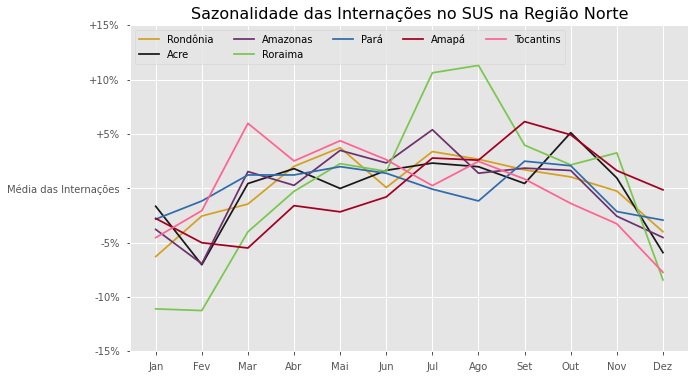

In [ ]:
# Visualização da sazonalidade dos dados na região Norte
plot_sazonalidade(dados_internacoes_agrupados_por_mes, Norte, 'Norte')

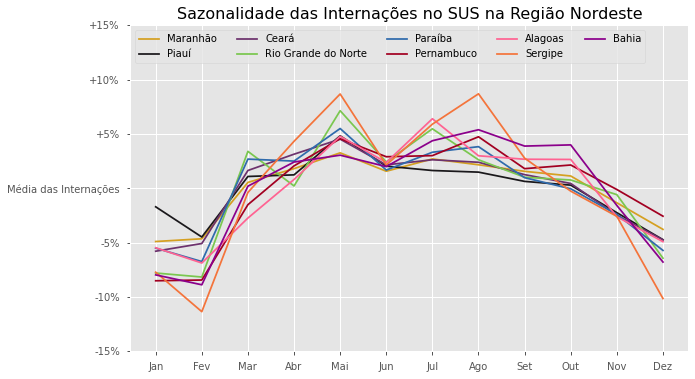

In [ ]:
# Visualização da sazonalidade dos dados na região Nordeste
plot_sazonalidade(dados_internacoes_agrupados_por_mes, Nordeste, 'Nordeste')

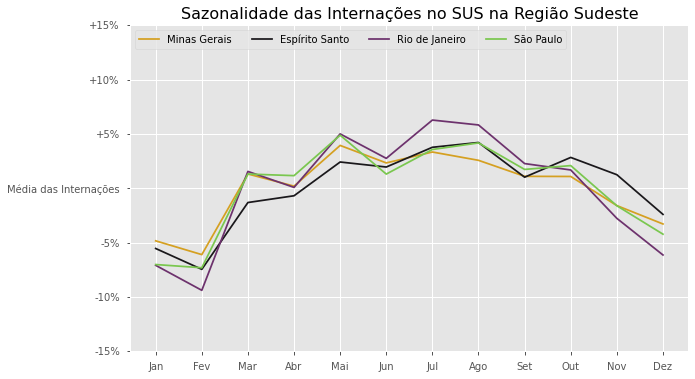

In [ ]:
# Visualização da sazonalidade dos dados na região Sudeste
plot_sazonalidade(dados_internacoes_agrupados_por_mes, Sudeste, 'Sudeste')

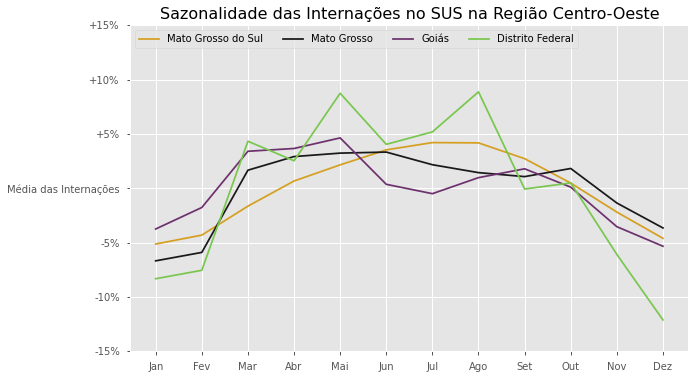

In [ ]:
# Visualização da sazonalidade dos dados na região Centro-Oeste
plot_sazonalidade(dados_internacoes_agrupados_por_mes, Centro_Oeste, 'Centro-Oeste')

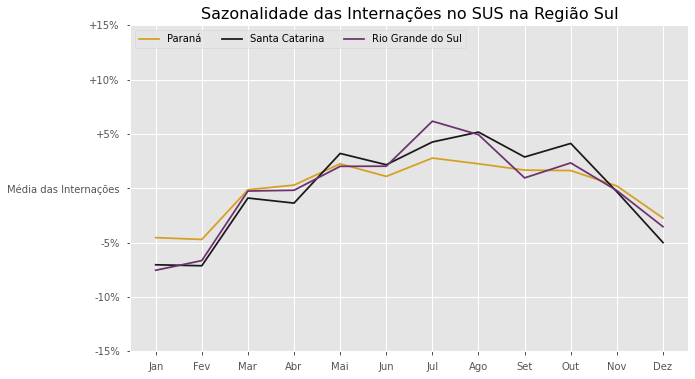

In [ ]:
# Visualização da sazonalidade dos dados na região Sul
plot_sazonalidade(dados_internacoes_agrupados_por_mes, Sul, 'Sul')

# Conclusões

O objetivo dessa análise é buscar um padrão de sazonalidade nos dados, pensando nisso podemos ver que praticamente em todos os estados o padrão do número de internações tem o pico por volta de Junho e Julho, assim como tem a maior baixa nos meses de Novembro à Janeiro. 

Com base nisso as pessoas responsáveis pelos recursos de saúde no Brasil pode tomar decisões melhores sobre em que época priorizar os recursos escassos.

O estado de Roraima chamou atenção por ter a maior volatividade do número de internações e seria interessante verificar se existe algum problema na fonte dos dados ou o porque da causa real dessa volatividade.